In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
rape_vic = pd.read_csv("20_Victims_of_rape.csv")
rape_vic.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [3]:
# Remove Total Rape Victims subgroup
rape_vic = rape_vic[rape_vic['Subgroup'] != 'Total Rape Victims']

In [4]:
# check if all rape cases are reported
rape_vic[rape_vic['Victims_of_Rape_Total'] != rape_vic['Rape_Cases_Reported']].head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67


In [5]:
rape_vic['Unreported_Cases'] = rape_vic['Victims_of_Rape_Total'] - rape_vic['Rape_Cases_Reported']
rape_vic[rape_vic['Unreported_Cases']>0].head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0,1
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45,2
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31,4
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49,8
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67,3


In [6]:
#unreported rape cases sorted by states throughout 2001 to 2010
vic_by_state = rape_vic.groupby("Area_Name").sum()
unreported_vic_by_state = vic_by_state[vic_by_state['Unreported_Cases']>0]
unreported_vic_by_state.drop('Year',axis=1,inplace=True)
unreported_vic_by_state

,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
Area_Name,,,,,,,,,
Chandigarh,227,0,46,52,75,24,228,31,1
Delhi,5146,13,882,1406,2059,267,5171,544,25
Goa,266,5,60,86,69,17,270,33,4
Gujarat,3337,8,253,550,2035,325,3339,168,2
Kerala,5296,60,426,1132,2730,700,5308,260,12
Madhya Pradesh,29256,181,2499,5554,14532,5783,29257,708,1
Maharashtra,14446,63,1305,4152,6560,1485,14505,940,59
Manipur,271,3,23,40,139,35,273,33,2
Meghalaya,726,4,131,183,262,41,739,118,13


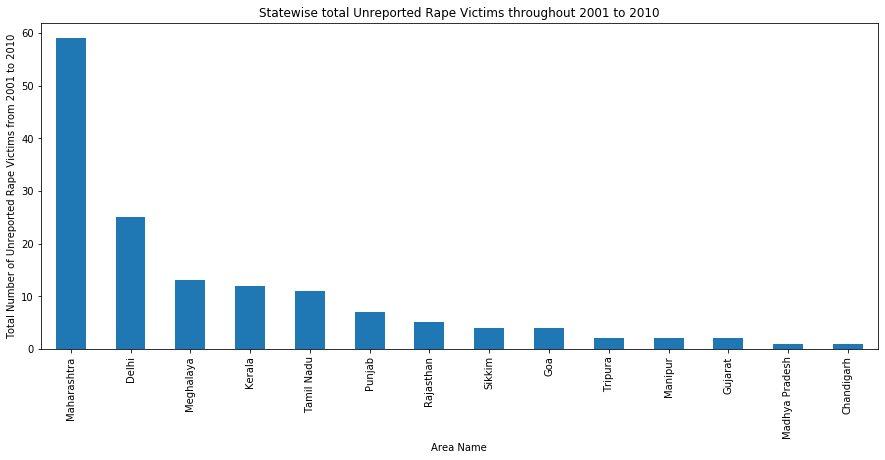

In [7]:
#plot the unreported rape cases sorted by states throughout 2001 to 2010
ct = unreported_vic_by_state['Unreported_Cases'].sort_values(ascending=False)
plt.subplots(figsize=(15,6))
ax = ct.plot.bar()
ax.set_xlabel('Area Name')
ax.set_ylabel('Total Number of Unreported Rape Victims from 2001 to 2010')
ax.set_title('Statewise total Unreported Rape Victims throughout 2001 to 2010')
plt.show()

In [8]:
rape_vic_by_state = rape_vic.groupby('Area_Name').sum()
rape_vic_by_state.drop('Year',axis=1,inplace=True)
print('Total Rape Victims = ', rape_vic_by_state['Rape_Cases_Reported'].sum())
rape_vic_by_state.sort_values(by='Rape_Cases_Reported',ascending = False).head()

Total Rape Victims =  190008


,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
Area_Name,,,,,,,,,
Madhya Pradesh,29256,181,2499,5554,14532,5783,29257,708,1
West Bengal,16378,10,156,273,12586,3290,16378,63,0
Uttar Pradesh,15053,12,1424,3092,8076,2086,15053,363,0
Maharashtra,14446,63,1305,4152,6560,1485,14505,940,59
Assam,12762,95,153,409,8507,3552,12762,46,0


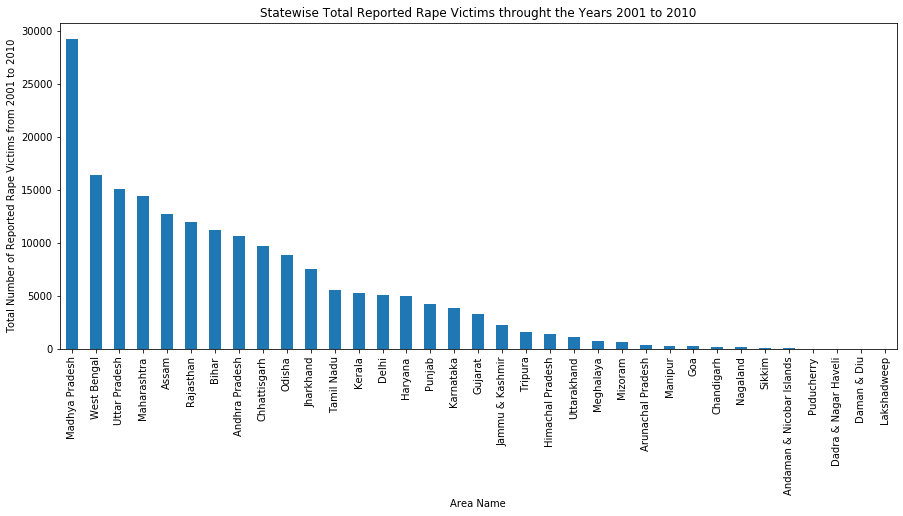

In [9]:
# plot total number of rape cases reported in each state
ct = rape_vic_by_state['Rape_Cases_Reported'].sort_values(ascending=False)
plt.subplots(figsize=(15,6))
ax= ct.plot.bar()
ax.set_xlabel('Area Name')
ax.set_ylabel('Total Number of Reported Rape Victims from 2001 to 2010')
ax.set_title('Statewise Total Reported Rape Victims throught the Years 2001 to 2010')
plt.show()

In [10]:
mp_rape_vic = rape_vic[rape_vic['Area_Name']=='Madhya Pradesh']
mp_rape_vic.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
571,Madhya Pradesh,2001,Victims of Incest Rape,301,0,39,66,130,56,301,10,0
572,Madhya Pradesh,2001,Victims of Other Rape,2550,27,265,491,1120,571,2550,76,0
574,Madhya Pradesh,2002,Victims of Incest Rape,72,1,11,16,37,4,72,3,0
575,Madhya Pradesh,2002,Victims of Other Rape,2819,13,174,236,1512,807,2819,77,0
577,Madhya Pradesh,2003,Victims of Incest Rape,123,0,10,23,71,16,123,3,0


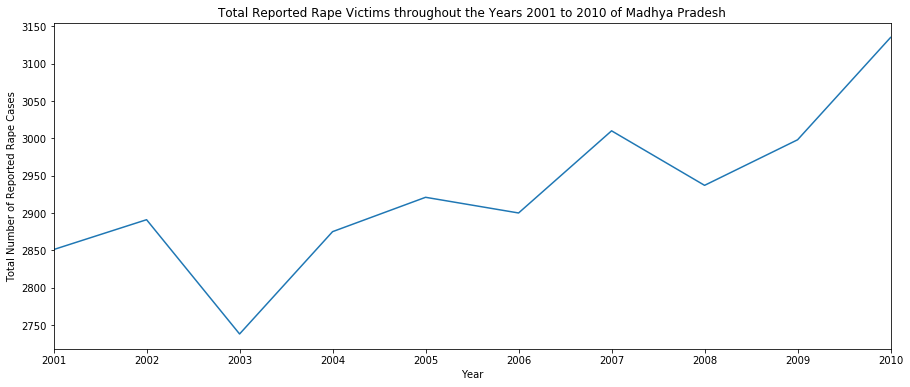

In [11]:
# plot of MP rape victims year wise
mp_rape_vic_yearwise = mp_rape_vic.groupby('Year').sum()
plt.subplots(figsize=(15,6))
ax = mp_rape_vic_yearwise['Rape_Cases_Reported'].plot()
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Reported Rape Cases')
ax.set_title('Total Reported Rape Victims throughout the Years 2001 to 2010 of Madhya Pradesh')
plt.show()

In [12]:
wb_rape_vic = rape_vic[rape_vic['Area_Name']=='West Bengal']
wb_rape_vic.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
1021,West Bengal,2001,Victims of Incest Rape,0,0,0,0,0,0,0,0,0
1022,West Bengal,2001,Victims of Other Rape,709,0,3,5,594,103,709,4,0
1024,West Bengal,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0,0
1025,West Bengal,2002,Victims of Other Rape,759,0,3,8,552,191,759,5,0
1027,West Bengal,2003,Victims of Incest Rape,15,0,2,0,12,0,15,1,0


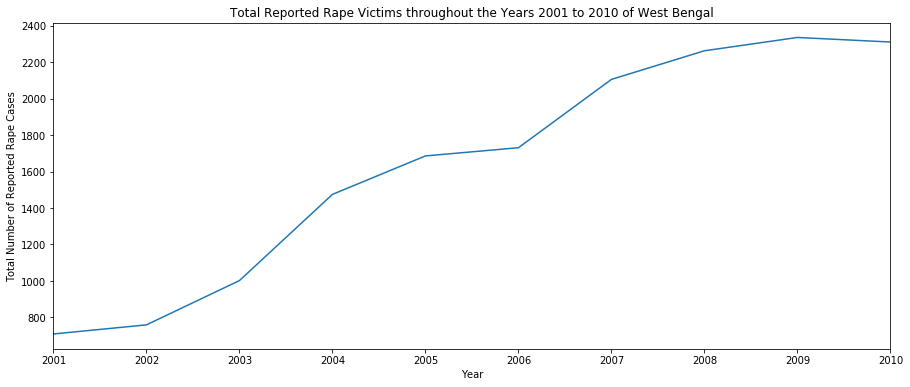

In [13]:
# Plot WB rape victims yearwise
wb_rape_vic_yearwise = wb_rape_vic.groupby('Year').sum()
plt.subplots(figsize=(15,6))
ax= wb_rape_vic_yearwise['Rape_Cases_Reported'].plot()
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Reported Rape Cases')
ax.set_title('Total Reported Rape Victims throughout the Years 2001 to 2010 of West Bengal')
plt.show()

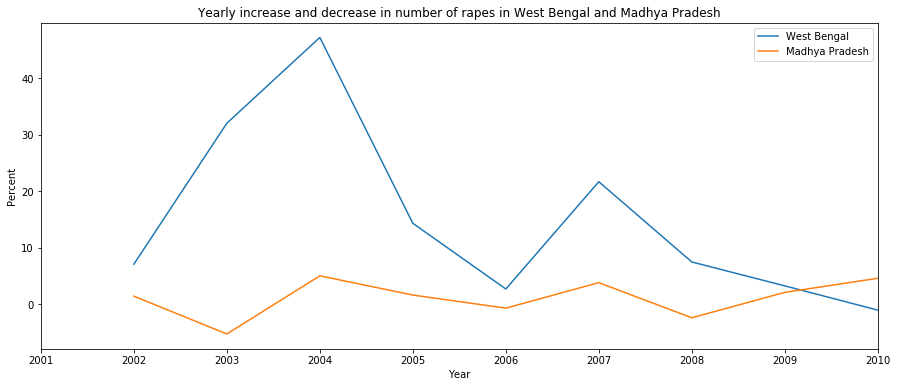

In [14]:
# calculate the percentage increase of number of rapes in West Bengal and compare it with Madhya Pradesh
plt.subplots(figsize = (15, 6))
ax = (wb_rape_vic_yearwise['Rape_Cases_Reported'].pct_change() * 100).plot(legend = True, 
                                                                              label = 'West Bengal')
(mp_rape_vic_yearwise['Rape_Cases_Reported'].pct_change() * 100).plot(ax = ax, legend = True, 
                                                                         label = 'Madhya Pradesh')
ax.set(xlabel = 'Year', ylabel = 'Percent', 
       title = 'Yearly increase and decrease in number of rapes in West Bengal and Madhya Pradesh')
plt.show()

In [15]:
print('Overall Increase in number of rapes in Madhya Pradesh =', 
      '{0:.2f}'.format(((mp_rape_vic_yearwise.iloc[9]['Rape_Cases_Reported'] 
                         - mp_rape_vic_yearwise.iloc[0]['Rape_Cases_Reported'])
                        /wb_rape_vic_yearwise.iloc[9]['Rape_Cases_Reported']) * 100), 'Percent')
print('Overall Increase in number of rapes in West Bengal =', 
      '{0:.2f}'.format(((wb_rape_vic_yearwise.iloc[9]['Rape_Cases_Reported'] 
                         - wb_rape_vic_yearwise.iloc[0]['Rape_Cases_Reported'])
                        /wb_rape_vic_yearwise.iloc[9]['Rape_Cases_Reported']) * 100), 'Percent')

Overall Increase in number of rapes in Madhya Pradesh = 12.29 Percent
Overall Increase in number of rapes in West Bengal = 69.32 Percent


In [16]:
rape_vic_incest = rape_vic[rape_vic['Subgroup']== 'Victims of Incest Rape']
rape_vic_incest.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0,0
7,Andaman & Nicobar Islands,2003,Victims of Incest Rape,0,0,0,0,0,0,0,0,0
10,Andaman & Nicobar Islands,2004,Victims of Incest Rape,0,0,0,0,0,0,0,0,0
13,Andaman & Nicobar Islands,2005,Victims of Incest Rape,0,0,0,0,0,0,0,0,0


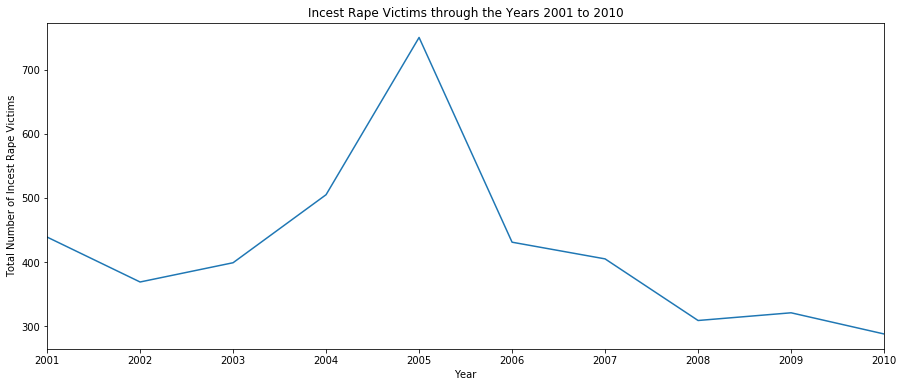

In [22]:
rape_vic_incest_yearwise = rape_vic_incest.groupby('Year').sum()
ct = rape_vic_incest_yearwise['Rape_Cases_Reported']
plt.subplots(figsize=(15,6))
ax = ct.plot()
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Incest Rape Victims')
ax.set_title ('Incest Rape Victims through the Years 2001 to 2010')
plt.show()

In [23]:
murder_vic = pd.read_csv("32_Murder_victim_age_sex.csv")
murder_vic.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0


In [28]:
murder_vic.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Victims_Above_50_Yrs', 'Victims_Total', 'Victims_Upto_10_15_Yrs',
       'Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs',
       'Victims_Upto_18_30_Yrs', 'Victims_Upto_30_50_Yrs'],
      dtype='object')

In [44]:
murder_vic_agewise = {'Victims_Above_50_Yrs':murder_vic['Victims_Above_50_Yrs'].sum(),
                      'Victims_Upto_10_15_Yrs':murder_vic['Victims_Upto_10_15_Yrs'].sum(),
                       'Victims_Upto_10_Yrs': murder_vic['Victims_Upto_10_Yrs'].sum(),
                      'Victims_Upto_15_18_Yrs':murder_vic['Victims_Upto_15_18_Yrs'].sum(),
                       'Victims_Upto_18_30_Yrs':murder_vic['Victims_Upto_18_30_Yrs'].sum(),
                      'Victims_Upto_30_50_Yrs':murder_vic['Victims_Upto_30_50_Yrs'].sum()}
murder_vic_agewise_df = pd.DataFrame(list(murder_vic_agewise.items()),index= ['Above 50','10_15','Upto_10','15_18','18_30',
                                                                       '30_50'])
murder_vic_agewise_df

,0,1
Above 50,Victims_Above_50_Yrs,64992.0
10_15,Victims_Upto_10_15_Yrs,8354.0
Upto_10,Victims_Upto_10_Yrs,13254.0
15_18,Victims_Upto_15_18_Yrs,15386.0
18_30,Victims_Upto_18_30_Yrs,317572.0
30_50,Victims_Upto_30_50_Yrs,276150.0


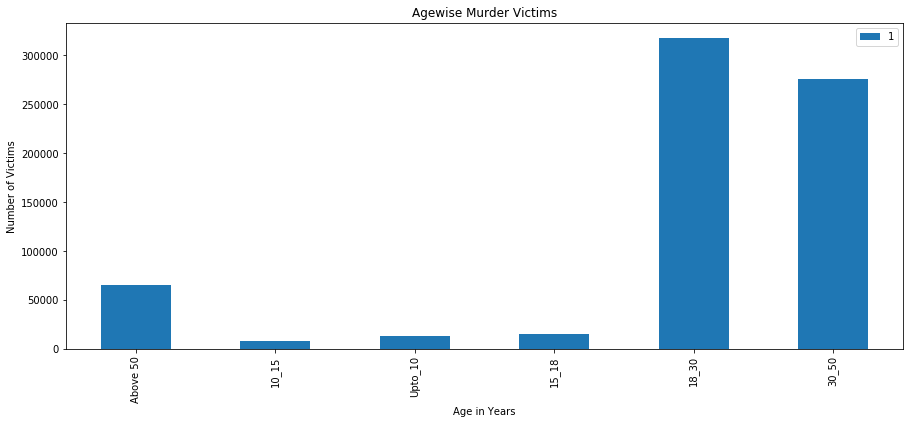

In [48]:
ax = murder_vic_agewise_df.plot(kind='bar',title = 'Agewise Murder Victims', figsize=(15,6))
ax.set(xlabel='Age in Years',ylabel='Number of Victims')
plt.show()

In [49]:
kidnap = pd.read_csv("39_Specific_purpose_of_kidnapping_and_abduction.csv")
kidnap.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,K_A_Cases_Reported,K_A_Female_10_15_Years,K_A_Female_15_18_Years,K_A_Female_18_30_Years,K_A_Female_30_50_Years,K_A_Female_Above_50_Years,K_A_Female_Total,K_A_Female_Upto_10_Years,K_A_Grand_Total,K_A_Male_10_15_Years,K_A_Male_15_18_Years,K_A_Male_18_30_Years,K_A_Male_30_50_Years,K_A_Male_Above_50_Years,K_A_Male_Total,K_A_Male_Upto_10_Years
0,Andhra Pradesh,2001,Kidnap - For Adoption,01. For Adoption,8.0,0.0,0.0,4.0,0.0,0.0,5.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
1,Arunachal Pradesh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Assam,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bihar,2001,Kidnap - For Adoption,01. For Adoption,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,15.0,3.0,0.0,18.0,0.0
4,Chandigarh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
kidnap_reason = kidnap.groupby("Sub_Group_Name").sum()
kidnap_reason.drop('Year',axis=1,inplace=True)
kidnap_reason.head()

,K_A_Cases_Reported,K_A_Female_10_15_Years,K_A_Female_15_18_Years,K_A_Female_18_30_Years,K_A_Female_30_50_Years,K_A_Female_Above_50_Years,K_A_Female_Total,K_A_Female_Upto_10_Years,K_A_Grand_Total,K_A_Male_10_15_Years,K_A_Male_15_18_Years,K_A_Male_18_30_Years,K_A_Male_30_50_Years,K_A_Male_Above_50_Years,K_A_Male_Total,K_A_Male_Upto_10_Years
Sub_Group_Name,,,,,,,,,,,,,,,,
01. For Adoption,958.0,38.0,122.0,263.0,14.0,0.0,470.0,33.0,963.0,34.0,30.0,267.0,84.0,3.0,493.0,75.0
02. For Begging,256.0,28.0,6.0,33.0,8.0,0.0,122.0,47.0,275.0,53.0,6.0,38.0,1.0,0.0,153.0,55.0
03. for Camel Racing,5.0,0.0,0.0,3.0,2.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04. For Illicit Intercourse,23541.0,1709.0,4246.0,13848.0,2994.0,26.0,22947.0,124.0,23552.0,45.0,66.0,290.0,183.0,2.0,605.0,19.0
05. For Marriage,118995.0,5696.0,23418.0,75877.0,11465.0,127.0,116732.0,149.0,119107.0,23.0,277.0,1623.0,420.0,19.0,2375.0,13.0


In [62]:
kidnap_reason['Total']=kidnap_reason.sum(axis=1,numeric_only=True)
kidnap_reason.head(20)

,K_A_Cases_Reported,K_A_Female_10_15_Years,K_A_Female_15_18_Years,K_A_Female_18_30_Years,K_A_Female_30_50_Years,K_A_Female_Above_50_Years,K_A_Female_Total,K_A_Female_Upto_10_Years,K_A_Grand_Total,K_A_Male_10_15_Years,K_A_Male_15_18_Years,K_A_Male_18_30_Years,K_A_Male_30_50_Years,K_A_Male_Above_50_Years,K_A_Male_Total,K_A_Male_Upto_10_Years,Total
Sub_Group_Name,,,,,,,,,,,,,,,,,
01. For Adoption,958.0,38.0,122.0,263.0,14.0,0.0,470.0,33.0,963.0,34.0,30.0,267.0,84.0,3.0,493.0,75.0,3847.0
02. For Begging,256.0,28.0,6.0,33.0,8.0,0.0,122.0,47.0,275.0,53.0,6.0,38.0,1.0,0.0,153.0,55.0,1081.0
03. for Camel Racing,5.0,0.0,0.0,3.0,2.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
04. For Illicit Intercourse,23541.0,1709.0,4246.0,13848.0,2994.0,26.0,22947.0,124.0,23552.0,45.0,66.0,290.0,183.0,2.0,605.0,19.0,94197.0
05. For Marriage,118995.0,5696.0,23418.0,75877.0,11465.0,127.0,116732.0,149.0,119107.0,23.0,277.0,1623.0,420.0,19.0,2375.0,13.0,476316.0
06. For Prostitution,2733.0,228.0,826.0,1891.0,300.0,51.0,3309.0,13.0,3414.0,4.0,5.0,53.0,36.0,3.0,105.0,4.0,12975.0
07. For Ransom,8817.0,60.0,64.0,817.0,207.0,15.0,1249.0,86.0,9341.0,617.0,626.0,3700.0,2222.0,270.0,8092.0,657.0,36840.0
08. For Revenge,5803.0,77.0,137.0,576.0,158.0,10.0,1045.0,87.0,5873.0,159.0,339.0,2622.0,1439.0,147.0,4828.0,122.0,23422.0
09. For Sale,626.0,44.0,75.0,305.0,84.0,30.0,570.0,32.0,686.0,5.0,15.0,41.0,18.0,18.0,116.0,19.0,2684.0


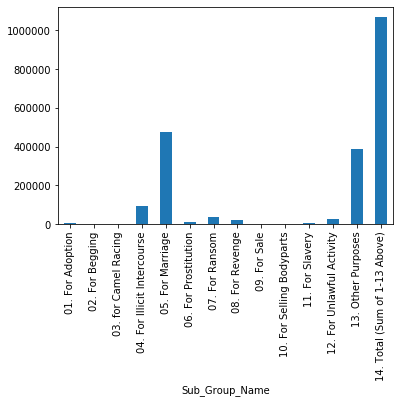

In [67]:
kidnap_reason['Total'].plot.bar()
plt.show()

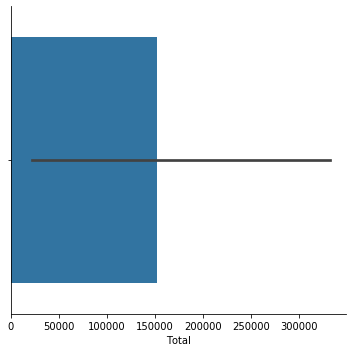

In [71]:
sns.factorplot(x='Total',kind='bar',data=kidnap_reason)